## Gather deep photometry for the extragalactic tertiary programs.

Also build the new filter curves so they can be added to `speclite`.

In [6]:
import os
import numpy as np
import fitsio
from astropy.table import Table
import astropy.units as u
from astropy.coordinates import SkyCoord
from speclite import filters as specfilters
import matplotlib.pyplot as plt

In [7]:
photodir = os.path.join(os.getenv('DESI_ROOT'), 'users', 'ioannis', 'tertiary', 'deep-photometry')
desidir = os.path.join(os.getenv('DESI_ROOT'), 'users', 'raichoor', 'laelbg', 'daily', 'healpix')

In [8]:
def gather_cosmos2020_filters():
    """
    https://cosmos.astro.caltech.edu/page/filterset
    https://eazy-py.readthedocs.io/en/latest/eazy/filters.html
    https://github.com/cosmic-dawn/cosmos2020-readcat/blob/main/COSMOS2020_readcat.ipynb    
    
    GALEX_FUV - 120 CAPAK/galex1500.res FUV lambda_c= 1.5364e+03 AB-Vega= 2.128 w95=372.4  
    GALEX_NUV - 121 CAPAK/galex2500.res NUV lambda_c= 2.2992e+03 AB-Vega= 1.665 w95=925.3  
    CFHT_u - 348 CFHT_Megaprime.u_sdss.dat-cfh9302 lambda_c= 3.54017e+03  
    CFHT_ustar - 88 megaprime/cfht_mega_u_cfh9301.dat CFHT-LS+atm lambda_c= 3.8280e+03 AB-Vega= 0.325 w95=771.0  
    HSC_g - 314 g_HSC.txt http://cosmos.astro.caltech.edu/page/filterset lambda_c=4798.2 AB-Vega=-0.089  
    HSC_r - 315 r_HSC.txt http://cosmos.astro.caltech.edu/page/filterset lambda_c=6218.4 AB-Vega=0.223  
    HSC_i - 316 i_HSC.txt http://cosmos.astro.caltech.edu/page/filterset lambda_c=7727.0 AB-Vega=0.468  
    HSC_z - 317 z_HSC.txt http://cosmos.astro.caltech.edu/page/filterset lambda_c=8908.2 AB-Vega=0.522  
    HSC_y - 318 y_HSC.txt http://cosmos.astro.caltech.edu/page/filterset lambda_c=9775.1 AB-Vega=0.740  
    UVISTA_Y - 256 VISTA/Y_system+atmos.dat at80K_forETC+trans_10_10 lambda_c= 1.0217e+04 AB-Vega= 0.596 w95=1025.7  
    UVISTA_J - 257 VISTA/J_system+atmos.dat lambda_c= 1.2527e+04 AB-Vega= 0.911 w95=1703.1  
    UVISTA_H - 258 VISTA/H_system+atmos.dat lambda_c= 1.6433e+04 AB-Vega= 1.355 w95=2843.9  
    UVISTA_Ks - 259 VISTA/Ks_system+atmos.dat lambda_c= 2.1503e+04 AB-Vega= 1.819 w95=3108.7  
    SC_IB427 - 181 Subaru_MB/IA427.dat lambda_c= 4.2600e+03 AB-Vega=-0.161 w95=223.1  
    SC_IB464 - 183 Subaru_MB/IA464.dat lambda_c= 4.6333e+03 AB-Vega=-0.167 w95=237.8  
    SC_IA484 - 184 Subaru_MB/IA484.dat lambda_c= 4.8473e+03 AB-Vega=-0.037 w95=249.5  
    SC_IB505 - 185 Subaru_MB/IA505.dat lambda_c= 5.0608e+03 AB-Vega=-0.077 w95=259.0  
    SC_IA527 - 186 Subaru_MB/IA527.dat lambda_c= 5.2593e+03 AB-Vega=-0.035 w95=281.7  
    SC_IB574 - 188 Subaru_MB/IA574.dat lambda_c= 5.7629e+03 AB-Vega= 0.054 w95=303.3  
    SC_IA624 - 190 Subaru_MB/IA624.dat lambda_c= 6.2308e+03 AB-Vega= 0.142 w95=336.6  
    SC_IA679 - 192 Subaru_MB/IA679.dat lambda_c= 6.7816e+03 AB-Vega= 0.245 w95=371.9  
    SC_IB709 - 193 Subaru_MB/IA709.dat lambda_c= 7.0735e+03 AB-Vega= 0.287 w95=358.3  
    SC_IA738 - 194 Subaru_MB/IA738.dat lambda_c= 7.3595e+03 AB-Vega= 0.334 w95=355.0  
    SC_IA767 - 195 Subaru_MB/IA768.dat lambda_c= 7.6804e+03 AB-Vega= 0.387 w95=388.5  
    SC_IB827 - 197 Subaru_MB/IA827.dat lambda_c= 8.2468e+03 AB-Vega= 0.475 w95=367.0  
    SC_NB711 - 322 COSMOS/SUBARU_filter_NB711.txt lambda_c= 7.1202e+03 AB-Vega= xxxx  
    SC_NB816 - 84 COSMOS/SUBARU_filter_NB816.txt lambda_c= 8.1509e+03 AB-Vega= 0.461 w95=162.0  
    UVISTA_NB118 - 321 VISTA-NB118 atm lambda_c= 1.1909e+04 AB-Vega= xxxx  
    SC_B - 78 COSMOS/SUBARU_filter_B.txt lambda_c= 4.4480e+03 AB-Vega=-0.112 w95=1035.4  
    SC_gp - 80 COSMOS/SUBARU_filter_g.txt lambda_c= 4.7609e+03 AB-Vega=-0.101 w95=1317.6  
    SC_V - 79 COSMOS/SUBARU_filter_V.txt lambda_c= 5.4702e+03 AB-Vega=-0.000 w95=993.1  
    SC_rp - 116 CAPAK_v2/r_subaru.res cosmos-r lambda_c= 6.2755e+03 AB-Vega= 0.154 w95=1379.4  
    SC_ip - 117 CAPAK_v2/i_subaru.res cosmos-i lambda_c= 7.6712e+03 AB-Vega= 0.380 w95=1488.9  
    SC_zp - 118 CAPAK_v2/z_subaru.res cosmos-z lambda_c= 9.0282e+03 AB-Vega= 0.514 w95=1410.5  
    SC_zpp - 284 Subaru/suprime_FDCCD_z.res lambda_c= 9.0963e+03 AB-Vega=0.516 w95=1424.0  
    IRAC_CH1 - 18 IRAC/irac_tr1_2004-08-09.dat 3.6micron lambda_c= 3.5569e+04 AB-Vega= 2.781 w95=7139.2  
    IRAC_CH2 - 19 IRAC/irac_tr2_2004-08-09.dat 4.5micron lambda_c= 4.5020e+04 AB-Vega= 3.254 w95=9705.5  
    IRAC_CH3 - 20 IRAC/irac_tr3_2004-08-09.dat 5.8micron lambda_c= 5.7450e+04 AB-Vega= 3.747 w95=13590.7  
    IRAC_CH4 - 21 IRAC/irac_tr4_2004-08-09.dat 8.0micron lambda_c= 7.9158e+04 AB-Vega= 4.387 w95=27892.8      
    
    """
    # Filter names, mean wavelength, and other info (see Table 1 in Weaver+22)
    filt_name = ['GALEX_FUV', 'GALEX_NUV','CFHT_u','CFHT_ustar','HSC_g', 'HSC_r', 'HSC_i', 
                 'HSC_z', 'HSC_y', 'UVISTA_Y', 'UVISTA_J', 'UVISTA_H', 'UVISTA_Ks', 
                 'SC_IB427', 'SC_IB464', 'SC_IA484', 'SC_IB505', 'SC_IA527', 'SC_IB574', 
                 'SC_IA624', 'SC_IA679', 'SC_IB709', 'SC_IA738', 'SC_IA767', 'SC_IB827', 
                 'SC_NB711', 'SC_NB816', 'UVISTA_NB118', 'SC_B', 'SC_gp', 'SC_V', 'SC_rp', 
                 'SC_ip','SC_zp', 'SC_zpp', 'IRAC_CH1', 'IRAC_CH2', 'IRAC_CH3','IRAC_CH4']  
    
    eazy_filtnum = [120, 121, 348, 88, 314, 315, 316, 317, 318, 256, 257, 258, 259, 181, 
                    183, 184, 185, 186, 188, 190, 192, 193, 194, 195, 197, 322, 84, 321, 
                    78, 80, 79, 116, 117, 118, 284, 18, 19, 20, 21]
    
    filt_lambda = [0.1526, 0.2307, 0.3709, 0.3858, 0.4847, 0.6219, 0.7699, 0.8894, 0.9761, 
                   1.0216, 1.2525, 1.6466,2.1557, 0.4266, 0.4635, 0.4851, 0.5064, 0.5261, 
                   0.5766, 0.6232, 0.6780, 0.7073, 0.7361, 0.7694, 0.8243, 0.7121, 0.8150, 
                   1.1909, 0.4488, 0.4804, 0.5487, 0.6305, 0.7693, 0.8978, 0.9063, 3.5686, 
                   4.5067,5.7788,7.9958]
    
    filt_fwhm = [0.0224, 0.07909, 0.05181, 0.05976, 0.1383, 0.1547, 0.1471, 0.0766, 0.0786, 
                 0.0923, 0.1718, 0.2905, 0.3074, 0.02073, 0.02182, 0.02292, 0.0231, 0.02429, 
                 0.02729, 0.03004, 0.03363, 0.03163, 0.03235, 0.03648, 0.0343, 0.0072, 0.01198, 
                 0.01122, 0.0892, 0.1265, 0.0954, 0.1376, 0.1497, 0.0847, 0.1335, 0.7443, 1.0119, 
                 1.4082,2.8796] 
    
    AlambdaDivEBV = [8.31,8.742,4.807,4.674,3.69,2.715,2.0, 1.515, 1.298, 1.213, 0.874, 0.565, 
                     0.365,4.261,3.844,3.622,3.425,3.265,2.938,2.694,2.431,2.29,2.151, 1.997, 
                     1.748,2.268, 1.787, 0.946,4.041,3.738,3.128,2.673,2.003, 1.436, 1.466, 
                     0.163, 0.112, 0.075, 0.045]
    
    # photometric offsets (not available for all filters, see Table 3 in W+21)
    zpoff1 = [0.000, -0.352, -0.077, -0.023, 0.073, 0.101, 0.038, 0.036, 0.086, 0.054, # Farmer+LePhare
              0.017, -0.045, 0.000, -0.104, -0.044, -0.021, -0.018, -0.045, -0.084, 0.005, 
              0.166, -0.023, -0.034, -0.032, -0.069, -0.010, -0.064, 0.000, 0.000, 0.000, 
              0.000, 0.000, 0.000, 0.000, 0.000, -0.212, -0.219, 0.000, 0.000]  
    
    zpoff2 = [0.000, -0.029, -0.006, 0.053, 0.128, 0.127, 0.094, 0.084, 0.100, # Classic+LePhare
              0.049, 0.025, -0.044, 0.000, -0.013, -0.008, 0.022, 0.025, 0.033, 
              -0.032, 0.031, 0.208, -0.009, 0.003, -0.015, -0.001, 0.023, -0.021, 
              -0.017, -0.075, 0.000, 0.123, 0.035, 0.051, 0.000, 0.095, -0.087, 
              -0.111, 0.000, 0.000]  
    
    zpoff3 = [0.000, 0.000, -0.196, -0.054, 0.006, 0.090, 0.043, 0.071, 0.118, # Farmer+EAZY
              0.078, 0.047, -0.034, 0.000, -0.199, -0.129, -0.084, -0.073, 
              -0.087, -0.124, 0.004, 0.154, -0.022, -0.030, -0.013, -0.057, 
              0.000, 0.000, 0.000, 0.000, 0.000, 0.000, 0.000, 0.000, 0.000, 
              0.000, -0.102, -0.044, 0.000, 0.000] 
    zpoff4 = [0.000, 0.000, 0.000, -0.021, 0.055, 0.124, 0.121, 0.121, 0.145, # Classic+EAZY
              0.085, 0.057, -0.036, 0.000, -0.133, -0.098, -0.046, -0.037, -0.038, 
              -0.062, 0.038, 0.214, 0.024, 0.022, 0.01, 0.022, 0.000, 0.000, 0.00, 
              0.00, 0.00, 0.00, 0.00, 0.00, 0.00, 0.00, 0.021, 0.025, 0.000, 0.000] 
    #print(len(zpoff1), len(zpoff2), len(zpoff3), len(zpoff4))
    
    filtinfo = {filt_name[i]: (filt_lambda[i]*1e4, filt_fwhm[i]*1e4, AlambdaDivEBV[i],
                               [zpoff1[i], zpoff2[i], zpoff3[i], zpoff4[i]], eazy_filtnum[i]) 
                for i in range(len(filt_name))}
    
    return filtinfo

def parse_cosmos2020(qa=False, verbose=False, catversion='Farmer'):
    """Parse the COSMOS2020 catalog from Weaver et al. 2022.
    
    See https://github.com/cosmic-dawn/cosmos2020-readcat/blob/main/COSMOS2020_readcat.ipynb
    
    * Tertiary23

    """
    catfile = os.path.join(photodir, 'parent', f'COSMOS2020_{catversion.upper()}_R1_v2.1_p3.fits')
    mask = fitsio.read(catfile, columns='FLAG_COMBINED')
    print(f'Read {len(mask):,d} objects from {catfile}')

    I = np.where(mask == 0)[0]
    cat = Table(fitsio.read(catfile, rows=I))
    print(f'Trimmed to {len(I):,d} objects in an unmasked region.')

    filtinfo = gather_cosmos2020_filters()
    
    if catversion == 'Farmer':
        fluxprefix = '_FLUX'  
        fluxerrprefix = '_FLUXERR'
    else:
        fluxprefix = '_FLUX_APER2'
        fluxerrprefix = '_FLUXERR_APER2'
        
    # apply photometric offsets
    offindx = 1 # Farmer + eazy
    
    for filt in filtinfo.keys():
        fluxcol = f'{filt}{fluxprefix}'
        fluxerrcol = f'{filt}{fluxerrprefix}'

        if verbose: 
            print(f'Applying photometric offset to {fluxcol}')
        offset = filtinfo[filt][3][offindx]
        
        if fluxcol in cat.colnames:
            cat[fluxcol] *= 10**(-0.4 * offset)
            cat[fluxerrcol] *= 10**(-0.4 * offset)
        else:
            print(f'Missing column {fluxcol}')
        
    outflx = 'uJy'
       
    return cat, filtinfo

#filtinfo = gather_cosmos2020_filters()

cosmos2020, cosmos2020_filters = parse_cosmos2020(verbose=False)
cosmos2020[:3]

Read 964,506 objects from /global/cfs/cdirs/desi/users/ioannis/tertiary/deep-photometry/parent/COSMOS2020_FARMER_R1_v2.1_p3.fits
Trimmed to 746,976 objects in an unmasked region.
Missing column SC_B_FLUX
Missing column SC_gp_FLUX
Missing column SC_V_FLUX
Missing column SC_rp_FLUX
Missing column SC_ip_FLUX
Missing column SC_zp_FLUX
Missing column SC_zpp_FLUX


ID,ALPHA_J2000,DELTA_J2000,X_MODEL,Y_MODEL,ERRX_MODEL,ERRY_MODEL,ALPHA_DETECTION,DELTA_DETECTION,FARMER_ID,GROUP_ID,N_GROUP,MODEL_FLAG,SOLUTION_MODEL,FLAG_HSC,FLAG_SUPCAM,FLAG_UDEEP,FLAG_UVISTA,FLAG_COMBINED,EBV_MW,CFHT_u_FLUX,CFHT_u_FLUXERR,CFHT_u_MAG,CFHT_u_MAGERR,CFHT_u_CHISQ,CFHT_u_DRIFT,CFHT_u_VALID,CFHT_ustar_FLUX,CFHT_ustar_FLUXERR,CFHT_ustar_MAG,CFHT_ustar_MAGERR,CFHT_ustar_CHISQ,CFHT_ustar_DRIFT,CFHT_ustar_VALID,HSC_g_FLUX,HSC_g_FLUXERR,HSC_g_MAG,HSC_g_MAGERR,HSC_g_CHISQ,HSC_g_DRIFT,HSC_g_VALID,HSC_r_FLUX,HSC_r_FLUXERR,HSC_r_MAG,HSC_r_MAGERR,HSC_r_CHISQ,HSC_r_DRIFT,HSC_r_VALID,HSC_i_FLUX,HSC_i_FLUXERR,HSC_i_MAG,HSC_i_MAGERR,HSC_i_CHISQ,HSC_i_DRIFT,HSC_i_VALID,HSC_z_FLUX,HSC_z_FLUXERR,HSC_z_MAG,HSC_z_MAGERR,HSC_z_CHISQ,HSC_z_DRIFT,HSC_z_VALID,HSC_y_FLUX,HSC_y_FLUXERR,HSC_y_MAG,HSC_y_MAGERR,HSC_y_CHISQ,HSC_y_DRIFT,HSC_y_VALID,UVISTA_Y_FLUX,UVISTA_Y_FLUXERR,UVISTA_Y_MAG,UVISTA_Y_MAGERR,UVISTA_Y_CHISQ,UVISTA_Y_DRIFT,UVISTA_Y_VALID,UVISTA_J_FLUX,UVISTA_J_FLUXERR,UVISTA_J_MAG,UVISTA_J_MAGERR,UVISTA_J_CHISQ,UVISTA_J_DRIFT,UVISTA_J_VALID,UVISTA_H_FLUX,UVISTA_H_FLUXERR,UVISTA_H_MAG,UVISTA_H_MAGERR,UVISTA_H_CHISQ,UVISTA_H_DRIFT,UVISTA_H_VALID,UVISTA_Ks_FLUX,UVISTA_Ks_FLUXERR,UVISTA_Ks_MAG,UVISTA_Ks_MAGERR,UVISTA_Ks_CHISQ,UVISTA_Ks_DRIFT,UVISTA_Ks_VALID,UVISTA_NB118_FLUX,UVISTA_NB118_FLUXERR,UVISTA_NB118_MAG,UVISTA_NB118_MAGERR,UVISTA_NB118_CHISQ,UVISTA_NB118_DRIFT,UVISTA_NB118_VALID,SC_IB427_FLUX,SC_IB427_FLUXERR,SC_IB427_MAG,SC_IB427_MAGERR,SC_IB427_CHISQ,SC_IB427_DRIFT,SC_IB427_VALID,SC_IB464_FLUX,SC_IB464_FLUXERR,SC_IB464_MAG,SC_IB464_MAGERR,SC_IB464_CHISQ,SC_IB464_DRIFT,SC_IB464_VALID,SC_IA484_FLUX,SC_IA484_FLUXERR,SC_IA484_MAG,SC_IA484_MAGERR,SC_IA484_CHISQ,SC_IA484_DRIFT,SC_IA484_VALID,SC_IB505_FLUX,SC_IB505_FLUXERR,SC_IB505_MAG,SC_IB505_MAGERR,SC_IB505_CHISQ,SC_IB505_DRIFT,SC_IB505_VALID,SC_IA527_FLUX,SC_IA527_FLUXERR,SC_IA527_MAG,SC_IA527_MAGERR,SC_IA527_CHISQ,SC_IA527_DRIFT,SC_IA527_VALID,SC_IB574_FLUX,SC_IB574_FLUXERR,SC_IB574_MAG,SC_IB574_MAGERR,SC_IB574_CHISQ,SC_IB574_DRIFT,SC_IB574_VALID,SC_IA624_FLUX,SC_IA624_FLUXERR,SC_IA624_MAG,SC_IA624_MAGERR,SC_IA624_CHISQ,SC_IA624_DRIFT,SC_IA624_VALID,SC_IA679_FLUX,SC_IA679_FLUXERR,SC_IA679_MAG,SC_IA679_MAGERR,SC_IA679_CHISQ,SC_IA679_DRIFT,SC_IA679_VALID,SC_IB709_FLUX,SC_IB709_FLUXERR,SC_IB709_MAG,SC_IB709_MAGERR,SC_IB709_CHISQ,SC_IB709_DRIFT,SC_IB709_VALID,SC_IA738_FLUX,SC_IA738_FLUXERR,SC_IA738_MAG,SC_IA738_MAGERR,SC_IA738_CHISQ,SC_IA738_DRIFT,SC_IA738_VALID,SC_IA767_FLUX,SC_IA767_FLUXERR,SC_IA767_MAG,SC_IA767_MAGERR,SC_IA767_CHISQ,SC_IA767_DRIFT,SC_IA767_VALID,SC_IB827_FLUX,SC_IB827_FLUXERR,SC_IB827_MAG,SC_IB827_MAGERR,SC_IB827_CHISQ,SC_IB827_DRIFT,SC_IB827_VALID,SC_NB711_FLUX,SC_NB711_FLUXERR,SC_NB711_MAG,SC_NB711_MAGERR,SC_NB711_CHISQ,SC_NB711_DRIFT,SC_NB711_VALID,SC_NB816_FLUX,SC_NB816_FLUXERR,SC_NB816_MAG,SC_NB816_MAGERR,SC_NB816_CHISQ,SC_NB816_DRIFT,SC_NB816_VALID,IRAC_CH1_FLUX,IRAC_CH1_FLUXERR,IRAC_CH1_MAG,IRAC_CH1_MAGERR,IRAC_CH1_CHISQ,IRAC_CH1_DRIFT,IRAC_CH1_VALID,IRAC_CH2_FLUX,IRAC_CH2_FLUXERR,IRAC_CH2_MAG,IRAC_CH2_MAGERR,IRAC_CH2_CHISQ,IRAC_CH2_DRIFT,IRAC_CH2_VALID,IRAC_CH3_FLUX,IRAC_CH3_FLUXERR,IRAC_CH3_MAG,IRAC_CH3_MAGERR,IRAC_CH3_CHISQ,IRAC_CH3_DRIFT,IRAC_CH3_VALID,IRAC_CH4_FLUX,IRAC_CH4_FLUXERR,IRAC_CH4_MAG,IRAC_CH4_MAGERR,IRAC_CH4_CHISQ,IRAC_CH4_DRIFT,IRAC_CH4_VALID,ID_GALEX,GALEX_NUV_FLUX,GALEX_NUV_FLUXERR,GALEX_NUV_MAG,GALEX_NUV_MAGERR,GALEX_FUV_FLUX,GALEX_FUV_FLUXERR,GALEX_FUV_MAG,GALEX_FUV_MAGERR,ID_COSMOS2015,SPLASH_CH1_FLUX,SPLASH_CH1_FLUXERR,SPLASH_CH1_MAG,SPLASH_CH1_MAGERR,SPLASH_CH2_FLUX,SPLASH_CH2_FLUXERR,SPLASH_CH2_MAG,SPLASH_CH2_MAGERR,SPLASH_CH3_FLUX,SPLASH_CH3_FLUXERR,SPLASH_CH3_MAG,SPLASH_CH3_MAGERR,SPLASH_CH4_FLUX,SPLASH_CH4_FLUXERR,SPLASH_CH4_MAG,SPLASH_CH4_MAGERR,ID_ACS,ACS_F814W_MAG,ACS_F814W_MAGERR,ACS_F814W_FLUX,ACS_F814W_FLUXERR,ACS_A_WORLD,ACS_B_WORLD,ACS_THETA_WORLD,ACS_FWHM_WORLD,ACS_MU_MAX,ACS_MU_CLASS,ID_CHANDRA,ID_CLASSIC,lp_zBEST,lp_type,lp_zPDF,lp_zPDF_l68,lp_zPDF_u68,lp_zMinChi2,lp_chi2_best,lp_zp_2,lp_chi2_2,lp_NbFilt,lp_zq,lp

In [9]:
def _parse_hsc_forced(cat, qa=False):
    """Support routine to just parse the HSC forced photometry."""
    
    # Rename the "forced_flux_[griz] columns. NB: there are two r- and i-band photometric 
    # measurements; take the ivar-weighted average.
    for band in ['g', 'z']:
        cat[f'flux_hsc_{band}'] = cat[f'forced_flux_{band}']
        cat[f'flux_ivar_hsc_{band}'] = cat[f'forced_flux_ivar_{band}']
    
    for band in ['r', 'i']:
        f1 = cat[f'forced_flux_{band}'].data
        f2 = cat[f'forced_flux_{band}2'].data
        i1 = cat[f'forced_flux_ivar_{band}'].data
        i2 = cat[f'forced_flux_ivar_{band}2'].data
        
        I = np.where(np.logical_or(i1 > 0, i2 > 0))[0]
        fnew = np.sum(i1[I, None] * f1[I, None] + i2[I, None] * f2[I, None], axis=1) / np.sum(i1[I, None] + i2[I, None], axis=1)
        inew = 1 / (1 / np.sum(i1[I, None] + i2[I, None], axis=1))

        if qa:
            B = (f1[I] > 0) * (f2[I] > 0) * (fnew > 0)
            fig, ax = plt.subplots(1, 2, figsize=(12, 4))
            ax[0].scatter(22.5-2.5*np.log10(fnew[B]), -2.5*np.log10(f1[I][B]/fnew[B]), 
                          alpha=0.5, s=1, label=band)
            ax[0].scatter(22.5-2.5*np.log10(fnew[B]), -2.5*np.log10(f2[I][B]/fnew[B]), 
                          alpha=0.5, s=1, label=f'{band}2')
            ax[0].set_ylim(-2, 2)
            ax[0].set_xlim(15, 32)
            ax[0].set_xlabel(f'Average {band} (AB mag)')
            ax[0].set_ylabel('$\Delta m$ (AB mag)')
            ax[0].legend(markerscale=5, loc='upper right')
        
            _ = ax[1].hist(-2.5*np.log10(f1[I][B]/fnew[B]), alpha=0.5, bins=100, range=(-1,1), label=band)
            _ = ax[1].hist(-2.5*np.log10(f2[I][B]/fnew[B]), alpha=0.5, bins=100, range=(-1,1), label=f'{band}2')
            ax[1].set_ylabel('Number')
            ax[1].set_xlabel('$\Delta m$ (AB mag)')
            ax[1].legend(loc='upper right')
            fig.tight_layout()

        cat[f'flux_hsc_{band}'] = np.zeros_like(f1)
        cat[f'flux_ivar_hsc_{band}'] = np.zeros_like(f1)

        cat[f'flux_hsc_{band}'][I] = fnew
        cat[f'flux_ivar_hsc_{band}'][I] = inew
    
    return cat

In [5]:
def parse_cosmos_subaru(qa=False):
    """Parse the COSMOS/Subaru Tertiary26 forced-photometry catalog.
    
    # Subaru intermediate-band filters

    filts = ['IA427','IA464','IA484','IA505','IA527']  
    lamfilts = [4263.45, 4635.13, 4849.20, 5062.51, 5261.13]  
    lamstring= ['427','464','484','505','527']  
    widfilts = [195.805, 213.663, 222.029, 225.998, 245.700]  
    Avfilts = [4.202,3.894,3.694,3.490,3.304]
    
    IA427 - 181 Subaru_MB/IA427.dat lambda_c= 4.2600e+03 AB-Vega=-0.161 w95=223.1  
    IA464 - 183 Subaru_MB/IA464.dat lambda_c= 4.6333e+03 AB-Vega=-0.167 w95=237.8  
    IA484 - 184 Subaru_MB/IA484.dat lambda_c= 4.8473e+03 AB-Vega=-0.037 w95=249.5  
    IA505 - 185 Subaru_MB/IA505.dat lambda_c= 5.0608e+03 AB-Vega=-0.077 w95=259.0  
    IA527 - 186 Subaru_MB/IA527.dat lambda_c= 5.2593e+03 AB-Vega=-0.035 w95=281.7  

    # HSC/Subaru broadband filters

    filts = ['g', 'r', 'i', 'z']  
    Av=[3.214, 2.165, 1.592, 1.211, 1.064]  

    HSC_g - 314 g_HSC.txt http://cosmos.astro.caltech.edu/page/filterset lambda_c=4798.2 AB-Vega=-0.089  
    HSC_r - 315 r_HSC.txt http://cosmos.astro.caltech.edu/page/filterset lambda_c=6218.4 AB-Vega=0.223  
    HSC_i - 316 i_HSC.txt http://cosmos.astro.caltech.edu/page/filterset lambda_c=7727.0 AB-Vega=0.468  
    HSC_z - 317 z_HSC.txt http://cosmos.astro.caltech.edu/page/filterset lambda_c=8908.2 AB-Vega=0.522  
    
    """
    catfile = os.path.join(photodir, 'parent', 'Subaru_tractor_forced_all.fits')

    cat = fitsio.read(catfile, columns=['brick_primary', 'maskbits', 'brightstarflag'])
    print(f'Read {len(cat):,d} objects from {catfile}')

    I = np.where((cat['brick_primary']) & (cat['maskbits'] == 0) & (cat['brightstarflag'] == 0))[0]
    cat = Table(fitsio.read(catfile, rows=I))#[:10]))
    print(f'Trimmed to {len(I):,d} objects in an unmasked region.')
    
    # rename the intermediate-band columns
    for band in ['i_a_l427', 'i_a_l464', 'i_a_l484', 'i_a_l505', 'i_a_l527']:
        newband = band.replace('_', '').replace('ial', 'ia')
        #print(newband)
        cat[f'flux_{newband}'] = cat[f'flux_{band}']
        cat[f'flux_ivar_{newband}'] = cat[f'flux_ivar_{band}']
    
    # parse the HSC forced photometry
    cat = _parse_hsc_forced(cat, qa=qa)
        
    # gather filter info
    filtinfo = {}
    for band, eazynum in zip(['hsc_g', 'hsc_r', 'hsc_i', 'hsc_z', 'IB427', 'IB464', 'IB484', 'IB505', 'IB527'],
                             [314, 315, 316, 317, 181, 183, 184, 185, 186]):
        filtinfo[band] = [eazynum]
        
    return cat, filtinfo

In [6]:
def parse_cosmos_odin(dr10=False, qa=False):
    """Parse the COSMOS/ODIN/HSC and/or COSMOS/ODIN/DR10 Tertiary26 forced-photometry catalogs.
    
    Initial sample cuts taken from Arjun's ODIN_COSMOS_N419.ipynb notebook.

    Extinction correction coefficients for the ODIN NB filters:
    
    a419 = 4.3238  # extinction correction for E(B-V)=1
    a501 = 3.54013 # extinction correction for E(B-V)=1
    a673 = 2.43846 # extinction correction for E(B-V)=1

    """
    if dr10:
        photcat = 'dr10'
    else:
        photcat = 'hsc'
    
    catfile = os.path.join(photodir, 'parent', f'ODIN_N419_tractor_{photcat.upper()}_forced_all.fits')

    cat = fitsio.read(catfile, columns=['ra', 'dec', 'brick_primary', 'maskbits', 
                                        'allmask_n419', 'nobs_n419', 
                                        'allmask_n501', 'nobs_n501'])
    print(f'Read {len(cat):,d} objects from {catfile}')

    ra0 = 150.11
    dc0 = 2.173
    I = np.where((cat['brick_primary']) & (cat['maskbits']==0)         # Brick Primary and no bad maskbits
                 & (cat['allmask_n419']==0) & (cat['nobs_n419'] >= 10) # ALLMASK = 0 for NB and at least 10 NB observations
                 & (cat['allmask_n501']==0) & (cat['nobs_n501'] >= 10) # ALLMASK = 0 for NB and at least 10 NB observations
                 & (np.abs(np.sqrt((cat['ra']-ra0)**2+(cat['dec']-dc0)**2)) <= 1.9))[0]
    
    cat = Table(fitsio.read(catfile, rows=I))
    print(f'Trimmed to {len(I):,d} objects after quality cuts.')

    if dr10:
        # rename the bandpass names
        for band in ['g', 'r', 'i', 'z']:
            cat[f'flux_decam_{band}'] = cat[f'forced_flux_{band}']
            cat[f'flux_ivar_decam_{band}'] = cat[f'forced_flux_ivar_{band}']
        
        #for band in ['g', 'r', 'i', 'z']:
        #    cat.rename
        filtinfo = {}
        #for band, eazynum in zip(['hsc_g', 'hsc_r', 'hsc_i', 'hsc_z', 'n419', 'n501', 'n673']):
        #                         [314, 315, 316, 317, 181, 183, 184, 185, 186]):
        
        # griz + n419, n501, n673
        #for band, eazynum in zip(['g', 'r', 'i', 'z', 'n419', 'n501', 'n673']):
        #                         []):
        #    filtinfo[band] = [eazynum]
    else:
        # parse the HSC forced photometry
        cat = _parse_hsc_forced(cat, qa=qa) 
        
        # gather filter info
        filtinfo = {}
        #for band, eazynum in zip(['hsc_g', 'hsc_r', 'hsc_i', 'hsc_z', 'n419', 'n501', 'n673']):
        #                         [314, 315, 316, 317, 181, 183, 184, 185, 186]):
        #    filtinfo[band] = [eazynum]
        #    
    return cat, filtinfo

In [7]:
def parse_xmm_odin(qa=False):
    """Parse the XMM/ODIN/HSC Tertiary18 forced-photometry catalogs.
    
    Extinction correction coefficients for the ODIN NB filters:
    
    a419 = 4.3238  # extinction correction for E(B-V)=1
    a501 = 3.54013 # extinction correction for E(B-V)=1
    a673 = 2.43846 # extinction correction for E(B-V)=1

    """
    catfile = os.path.join(photodir, 'parent', 'tractor-xmm-N419-hsc-forced.fits')

    cat = fitsio.read(catfile, columns=['ra', 'dec', 'brick_primary', 'maskbits', 
                                        'allmask_n419', 'nobs_n419'])
    print(f'Read {len(cat):,d} objects from {catfile}')

    I = np.where((cat['brick_primary']) & (cat['maskbits']==0)         # Brick Primary and no bad maskbits
                 & (cat['allmask_n419']==0) & (cat['nobs_n419'] > 1))[0]
    
    cat = Table(fitsio.read(catfile, rows=I))
    print(f'Trimmed to {len(I):,d} objects after quality cuts.')

    # parse the HSC forced photometry
    cat = _parse_hsc_forced(cat, qa=qa) 
        
    # gather filter info
    filtinfo = {}
    #for band, eazynum in zip(['hsc_g', 'hsc_r', 'hsc_i', 'hsc_z', 'n419', 'n501', 'n673']):
    #                         [314, 315, 316, 317, 181, 183, 184, 185, 186]):
    #    filtinfo[band] = [eazynum]

    return cat, filtinfo

In [8]:
subaru_ter26, subaru_ter26_filters = parse_cosmos_subaru(qa=False)
subaru_ter26[:3]

Read 729,081 objects from /global/cfs/cdirs/desi/users/ioannis/tertiary/deep-photometry/parent/Subaru_tractor_forced_all.fits
Trimmed to 531,823 objects in an unmasked region.


release,brickid,brickname,objid,brick_primary,maskbits,fitbits,type,ra,dec,ra_ivar,dec_ivar,bx,by,dchisq,ebv,mjd_min,mjd_max,ref_cat,ref_id,pmra,pmdec,parallax,pmra_ivar,pmdec_ivar,parallax_ivar,ref_epoch,gaia_phot_g_mean_mag,gaia_phot_g_mean_flux_over_error,gaia_phot_g_n_obs,gaia_phot_bp_mean_mag,gaia_phot_bp_mean_flux_over_error,gaia_phot_bp_n_obs,gaia_phot_rp_mean_mag,gaia_phot_rp_mean_flux_over_error,gaia_phot_rp_n_obs,gaia_phot_variable_flag,gaia_astrometric_excess_noise,gaia_astrometric_excess_noise_sig,gaia_astrometric_n_obs_al,gaia_astrometric_n_good_obs_al,gaia_astrometric_weight_al,gaia_duplicated_source,gaia_a_g_val,gaia_e_bp_min_rp_val,gaia_phot_bp_rp_excess_factor,gaia_astrometric_sigma5d_max,gaia_astrometric_params_solved,flux_i_a_l427,flux_i_a_l464,flux_i_a_l484,flux_i_a_l505,flux_i_a_l527,flux_ivar_i_a_l427,flux_ivar_i_a_l464,flux_ivar_i_a_l484,flux_ivar_i_a_l505,flux_ivar_i_a_l527,fiberflux_i_a_l427,fiberflux_i_a_l464,fiberflux_i_a_l484,fiberflux_i_a_l505,fiberflux_i_a_l527,fibertotflux_i_a_l427,fibertotflux_i_a_l464,fibertotflux_i_a_l484,fibertotflux_i_a_l505,fibertotflux_i_a_l527,apflux_i_a_l427,apflux_i_a_l464,apflux_i_a_l484,apflux_i_a_l505,apflux_i_a_l527,apflux_resid_i_a_l427,apflux_resid_i_a_l464,apflux_resid_i_a_l484,apflux_resid_i_a_l505,apflux_resid_i_a_l527,apflux_blobresid_i_a_l427,apflux_blobresid_i_a_l464,apflux_blobresid_i_a_l484,apflux_blobresid_i_a_l505,apflux_blobresid_i_a_l527,apflux_ivar_i_a_l427,apflux_ivar_i_a_l464,apflux_ivar_i_a_l484,apflux_ivar_i_a_l505,apflux_ivar_i_a_l527,apflux_masked_i_a_l427,apflux_masked_i_a_l464,apflux_masked_i_a_l484,apflux_masked_i_a_l505,apflux_masked_i_a_l527,nobs_i_a_l427,nobs_i_a_l464,nobs_i_a_l484,nobs_i_a_l505,nobs_i_a_l527,rchisq_i_a_l427,rchisq_i_a_l464,rchisq_i_a_l484,rchisq_i_a_l505,rchisq_i_a_l527,fracflux_i_a_l427,fracflux_i_a_l464,fracflux_i_a_l484,fracflux_i_a_l505,fracflux_i_a_l527,fracmasked_i_a_l427,fracmasked_i_a_l464,fracmasked_i_a_l484,fracmasked_i_a_l505,fracmasked_i_a_l527,fracin_i_a_l427,fracin_i_a_l464,fracin_i_a_l484,fracin_i_a_l505,fracin_i_a_l527,ngood_i_a_l427,ngood_i_a_l464,ngood_i_a_l484,ngood_i_a_l505,ngood_i_a_l527,anymask_i_a_l427,anymask_i_a_l464,anymask_i_a_l484,anymask_i_a_l505,anymask_i_a_l527,allmask_i_a_l427,allmask_i_a_l464,allmask_i_a_l484,allmask_i_a_l505,allmask_i_a_l527,psfsize_i_a_l427,psfsize_i_a_l464,psfsize_i_a_l484,psfsize_i_a_l505,psfsize_i_a_l527,psfdepth_i_a_l427,psfdepth_i_a_l464,psfdepth_i_a_l484,psfdepth_i_a_l505,psfdepth_i_a_l527,galdepth_i_a_l427,galdepth_i_a_l464,galdepth_i_a_l484,galdepth_i_a_l505,galdepth_i_a_l527,nea_i_a_l427,nea_i_a_l464,nea_i_a_l484,nea_i_a_l505,nea_i_a_l527,blob_nea_i_a_l427,blob_nea_i_a_l464,blob_nea_i_a_l484,blob_nea_i_a_l505,blob_nea_i_a_l527,sersic,sersic_ivar,shape_r,shape_r_ivar,shape_e1,shape_e1_ivar,shape_e2,shape_e2_ivar,forced_flux_g,forced_flux_ivar_g,forced_apflux_g,forced_apflux_ivar_g,forced_psfdepth_g,forced_galdepth_g,forced_nexp_g,forced_flux_i,forced_flux_ivar_i,forced_apflux_i,forced_apflux_ivar_i,forced_psfdepth_i,forced_galdepth_i,forced_nexp_i,forced_flux_i2,forced_flux_ivar_i2,forced_apflux_i2,forced_apflux_ivar_i2,forced_psfdepth_i2,forced_galdepth_i2,forced_nexp_i2,forced_flux_r,forced_flux_ivar_r,forced_apflux_r,forced_apflux_ivar_r,forced_psfdepth_r,forced_galdepth_r,forced_nexp_r,forced_flux_r2,forced_flux_ivar_r2,forced_apflux_r2,forced_apflux_ivar_r2,forced_psfdepth_r2,forced_galdepth_r2,forced_nexp_r2,forced_flux_z,forced_flux_ivar_z,forced_apflux_z,forced_apflux_ivar_z,forced_psfdepth_z,forced_galdepth_z,forced_nexp_z,brightstarflag,flux_ia427,flux_ivar_ia427,flux_ia464,flux_ivar_ia464,flux_ia484,flux_ivar_ia484,flux_ia505,flux_ivar_ia505,flux_ia527,flux_ivar_ia527,flux_hsc_g,flux_ivar_hsc_g,flux_hsc_z,flux_ivar_hsc_z,flux_hsc_r,flux_ivar_hsc_r,flux_hsc_i,flux_ivar_hsc_i
int16,int32,str8,int32,bool,int32,int16,str3,float64,float64,float32,float32,float32,float32,float32[5],float32,float64,float64,str2,int64,float32,float32,float32,float32,float32,fl

In [9]:
odinhsc_ter26, odinhsc_ter26_filters = parse_cosmos_odin(dr10=False, qa=False)
odinhsc_ter26['ra', 'dec', 'flux_hsc_g', 'flux_hsc_r', 'flux_hsc_i', 'flux_hsc_z', 'flux_n419', 'flux_n501', 'flux_n673'][:3]

Read 2,136,031 objects from /global/cfs/cdirs/desi/users/ioannis/tertiary/deep-photometry/parent/ODIN_N419_tractor_HSC_forced_all.fits
Trimmed to 2,133,588 objects after quality cuts.


ra,dec,flux_hsc_g,flux_hsc_r,flux_hsc_i,flux_hsc_z,flux_n419,flux_n501,flux_n673
float64,float64,float32,float32,float32,float32,float32,float32,float32
150.50003356048097,1.8475316473041843,0.031550575,0.087824784,0.23758018,0.56924176,0.01959635,0.012574598,0.14711675
150.50003480027496,1.832467668905567,0.048727285,0.051310398,0.065520786,0.073102586,0.034744155,0.074132465,0.055011537
150.50003984429097,1.8299942208129527,0.033877604,0.034521345,0.041549772,0.060372982,0.012153106,0.03059299,0.040102176


In [10]:
odindr10_ter26, odindr10_ter26_filters = parse_cosmos_odin(dr10=True, qa=False)
odindr10_ter26['ra', 'dec', 'flux_decam_g', 'flux_decam_r', 'flux_decam_i', 'flux_decam_z', 'flux_n419', 'flux_n501', 'flux_n673'][:3]

Read 2,240,981 objects from /global/cfs/cdirs/desi/users/ioannis/tertiary/deep-photometry/parent/ODIN_N419_tractor_DR10_forced_all.fits
Trimmed to 2,235,028 objects after quality cuts.


ra,dec,flux_decam_g,flux_decam_r,flux_decam_i,flux_decam_z,flux_n419,flux_n501,flux_n673
float64,float64,float32,float32,float32,float32,float32,float32,float32
150.50003356048097,1.8475316473041843,0.019095385,0.10259537,0.25585526,0.71632636,0.01959635,0.012574598,0.14711675
150.50003480027496,1.832467668905567,0.040205844,0.055823386,0.05847081,0.11388259,0.034744155,0.074132465,0.055011537
150.50003984429097,1.8299942208129527,0.030191764,0.034833126,0.03660283,0.08931801,0.012153106,0.03059299,0.040102176


In [11]:
odinhsc_ter18, odinhsc_ter28_filters = parse_xmm_odin(qa=False)
odinhsc_ter18[:3]

Read 1,219,445 objects from /global/cfs/cdirs/desi/users/ioannis/tertiary/deep-photometry/parent/tractor-xmm-N419-hsc-forced.fits
Trimmed to 1,153,916 objects after quality cuts.


release,brickid,brickname,objid,brick_primary,maskbits,fitbits,type,ra,dec,ra_ivar,dec_ivar,bx,by,dchisq,ebv,mjd_min,mjd_max,ref_cat,ref_id,pmra,pmdec,parallax,pmra_ivar,pmdec_ivar,parallax_ivar,ref_epoch,gaia_phot_g_mean_mag,gaia_phot_g_mean_flux_over_error,gaia_phot_g_n_obs,gaia_phot_bp_mean_mag,gaia_phot_bp_mean_flux_over_error,gaia_phot_bp_n_obs,gaia_phot_rp_mean_mag,gaia_phot_rp_mean_flux_over_error,gaia_phot_rp_n_obs,gaia_phot_variable_flag,gaia_astrometric_excess_noise,gaia_astrometric_excess_noise_sig,gaia_astrometric_n_obs_al,gaia_astrometric_n_good_obs_al,gaia_astrometric_weight_al,gaia_duplicated_source,gaia_a_g_val,gaia_e_bp_min_rp_val,gaia_phot_bp_rp_excess_factor,gaia_astrometric_sigma5d_max,gaia_astrometric_params_solved,flux_n419,flux_ivar_n419,fiberflux_n419,fibertotflux_n419,apflux_n419,apflux_resid_n419,apflux_blobresid_n419,apflux_ivar_n419,apflux_masked_n419,nobs_n419,rchisq_n419,fracflux_n419,fracmasked_n419,fracin_n419,ngood_n419,anymask_n419,allmask_n419,psfsize_n419,psfdepth_n419,galdepth_n419,nea_n419,blob_nea_n419,sersic,sersic_ivar,shape_r,shape_r_ivar,shape_e1,shape_e1_ivar,shape_e2,shape_e2_ivar,forced_flux_g,forced_flux_ivar_g,forced_apflux_g,forced_apflux_ivar_g,forced_psfdepth_g,forced_galdepth_g,forced_nexp_g,forced_flux_i,forced_flux_ivar_i,forced_apflux_i,forced_apflux_ivar_i,forced_psfdepth_i,forced_galdepth_i,forced_nexp_i,forced_flux_r,forced_flux_ivar_r,forced_apflux_r,forced_apflux_ivar_r,forced_psfdepth_r,forced_galdepth_r,forced_nexp_r,forced_flux_z,forced_flux_ivar_z,forced_apflux_z,forced_apflux_ivar_z,forced_psfdepth_z,forced_galdepth_z,forced_nexp_z,forced_flux_ivar_i2,forced_nexp_i2,forced_psfdepth_i2,forced_psfdepth_r2,forced_galdepth_r2,forced_apflux_r2,forced_nexp_r2,forced_flux_i2,forced_apflux_ivar_r2,forced_galdepth_i2,forced_flux_ivar_r2,forced_flux_r2,forced_apflux_i2,forced_apflux_ivar_i2,flux_hsc_g,flux_ivar_hsc_g,flux_hsc_z,flux_ivar_hsc_z,flux_hsc_r,flux_ivar_hsc_r,flux_hsc_i,flux_ivar_hsc_i
int16,int32,str8,int32,bool,int32,int16,str3,float64,float64,float32,float32,float32,float32,float32[5],float32,float64,float64,str2,int64,float32,float32,float32,float32,float32,float32,float32,float32,float32,int32,float32,float32,int16,float32,float32,int16,bool,float32,float32,int16,int16,float32,bool,float32,float32,float32,float32,uint8,float32,float32,float32,float32,float32[8],float32[8],float32[8],float32[8],float32[8],int16,float32,float32,float32,float32,int16,int16,int16,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32[8],float32[8],float32,float32,int32,float32,float32,float32[8],float32[8],float32,float32,int32,float32,float32,float32[8],float32[8],float32,float32,int32,float32,float32,float32[8],float32[8],float32,float32,int32,float32,int32,float32,float32,float32,float32[8],int32,float32,float32[8],float32,float32,float32,float32[8],float32[8],float32,float32,float32,float32,float32,float32,float32,float32
9999,304593,0329m045,3,True,0,1024,REX,33.03694873073565,-4.615367715466813,1816418800.0,2181862100.0,835.6496,214.24498,155.44392 .. 0.0,0.018925667,59882.27332582073,59883.31483564073,,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,0.0,0,0.0,0.0,0,False,0.0,0.0,0,0,0.0,False,0.0,0.0,0.0,0.0,0,0.99201405,166.13889,0.5384418,0.5384418,0.21675749 .. 0.54250664,0.024458561 .. -0.46640047,0.024458561 .. -0.45642838,1513.5446 .. 9.461235,0.0 .. 0.019316558,2,0.82614285,0.0,0.21055163,0.6382494,1,64,0,1.625374,240.14595,153.23239,8.388808,6.3151793,1.0,0.0,0.45434108,143.78185,0.0,0.0,0.0,0.0,1.4536439,10664.084,0.37104484 .. 2.2183192,66194.45 .. 451.55237,7143.5576,5367.967,3,7.119141,4898.4243,2.1829207 .. 10.441352,24492.387 .. 158.41333,4544.308,3038.999,7,3.5611901,2879.8506,0.8707978 .. 5.0169234,19243.926 .. 128.73929,1665.6976,1285.5823,3,9.749443,1094.2891,2.7132642 .. 13.726209,6279.764 .. 37.491055,1068.2521,698.01337,7,0.0,0,0.0,0.0,0.0,0.0 .. 0.0,0,0.0,0.0 .. 0.0,0.0,0.0,0.0,0.0

### Match to the various merged-tertiary?? files

In [12]:
def match_phot_to_desi(phot, tertiary='26', racolumn='ra', deccolumn='dec', 
                       rad=1., label='COSMOS2020', title='COSMOS', outprefix='', 
                       qa=True):
    """
    https://data.desi.lbl.gov/desi/survey/fiberassign/special/tertiary/0026/tertiary-config-0026.yaml

    """
    from astropy.table import Column

    print(f'Input photometric catalog has {len(phot):,d} objects.')
    
    mergedirs = {
        '15': os.path.join(desidir, 'tertiary15-thru20221216'),
        '18': os.path.join(desidir, 'tertiary18-thru20230112'), # need v2! - original is missing an exposure
        '23': os.path.join(desidir, 'tertiary23-thru20230326'),
        '26': os.path.join(desidir, 'tertiary26-thru20230416'),
        '34': os.path.join(desidir, 'tertiary34-thru20230617'),
        '35': os.path.join(desidir, 'tertiary35-thru20230618')
    }
    mergedir = mergedirs[tertiary]
    mergesuffix = os.path.basename(mergedir).replace('-v2', '')
    mergefile = os.path.join(mergedir, f'merge-{mergesuffix}.fits')
    #print(mergefile)
        
    desi = Table(fitsio.read(mergefile))
    ndesi = len(desi)
    print(f'Read {ndesi:,d} DESI targets from {mergefile}')
      
    c_desi = SkyCoord(ra=desi['TARGET_RA']*u.deg, dec=desi['TARGET_DEC']*u.deg)
    c_phot = SkyCoord(ra=phot[racolumn]*u.deg, dec=phot[deccolumn]*u.deg)
        
    #_, sep2d, _ = c_phot.match_to_catalog_sky(c_desi)
    #plt.hist(sep2d.arcsec, bins=100)
        
    indx_phot, d2d, _ = c_desi.match_to_catalog_sky(c_phot)
    indx_desi = np.where(d2d.arcsec < rad)[0]
    indx_phot = indx_phot[indx_desi]
    print(f'Matched photometry for {len(indx_desi):,d} DESI targets.')
        
    #indx_desi, indx_phot, d2d, _ = c_phot.search_around_sky(c_desi, rad*u.arcsec)
    #indx_miss_desi = np.delete(np.arange(len(desi)), indx_desi)

    if qa:
        fig, ax = plt.subplots(figsize=(5, 5))
        ax.scatter(desi['TARGET_RA'], desi['TARGET_DEC'], s=1, zorder=0,
                   marker='o', color='k', alpha=0.5, label=f'DESI-tertiary{tertiary} (all, N={len(desi):,d})')
        ax.scatter(phot[racolumn], phot[deccolumn], s=1, zorder=1,
                   marker='o', color='orange', alpha=0.7, label=f'{label} (all, N={len(phot):,d})')
        ax.scatter(desi['TARGET_RA'][indx_desi], desi['TARGET_DEC'][indx_desi], s=1, zorder=2,
                   marker='s', color='blue', alpha=0.7, label=f'DESI-tertiary{tertiary} (N={len(indx_desi):,d} matches)')
        ax.set_title(f'{title} - Tertiary{tertiary}')
        ax.set_xlabel('RA')
        ax.set_ylabel('Dec')
        ax.legend(markerscale=5, loc='lower right')
        fig.tight_layout()
        
    outfile = os.path.join(photodir, f'{mergesuffix}-{outprefix}.fits')
    #outfile = datadir+'/'+os.path.basename(mergefile).replace('.fits', '-'+outprefix+'.fits')
        
    out = Table()
    out['TARGETID'] = desi['TARGETID']
    for col in phot.colnames:
        if phot[col].ndim > 1:
            out[col.upper()] = np.zeros(shape=(ndesi, phot[col].shape[1]), dtype=phot[col].dtype)
            out[col.upper()][indx_desi, :] = phot[col][indx_phot, :]
        else:
            out[col.upper()] = np.zeros(ndesi, dtype=phot[col].dtype)              
            out[col.upper()][indx_desi] = phot[col][indx_phot]

    print(f'Wrote {len(out):,d} objects to {outfile}')
    out.write(outfile, overwrite=True)

    return phot[indx_phot], desi[indx_desi]#, desi[indx_miss_desi]

### Tertiary 18

Input photometric catalog has 1,153,916 objects.
Read 4,586 DESI targets from /global/cfs/cdirs/desi/users/raichoor/laelbg/daily/healpix/tertiary18-thru20230112/merge-tertiary18-thru20230112.fits
Matched photometry for 4,547 DESI targets.
Wrote 4,586 objects to /global/cfs/cdirs/desi/users/ioannis/tertiary/deep-photometry/tertiary18-thru20230112-odin-hsc.fits


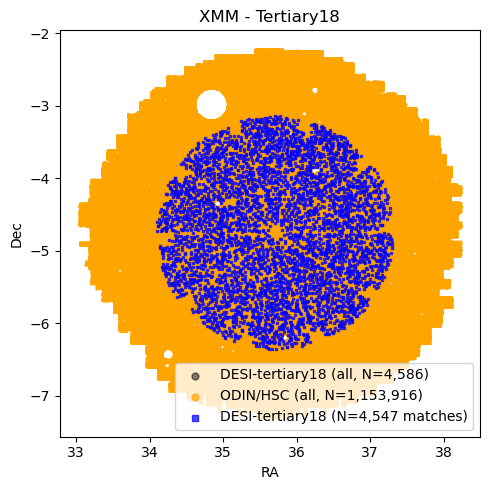

In [13]:
modinhsc_ter18, modinhsc_desi_ter18 = match_phot_to_desi(odinhsc_ter18, tertiary='18', racolumn='ra', deccolumn='dec', 
                                                         label='ODIN/HSC', title='XMM', outprefix='odin-hsc')

### Tertiary 23

Input photometric catalog has 746,976 objects.
Read 18,755 DESI targets from /global/cfs/cdirs/desi/users/raichoor/laelbg/daily/healpix/tertiary23-thru20230326/merge-tertiary23-thru20230326.fits
Matched photometry for 2,727 DESI targets.
Wrote 18,755 objects to /global/cfs/cdirs/desi/users/ioannis/tertiary/deep-photometry/tertiary23-thru20230326-cosmos2020.fits


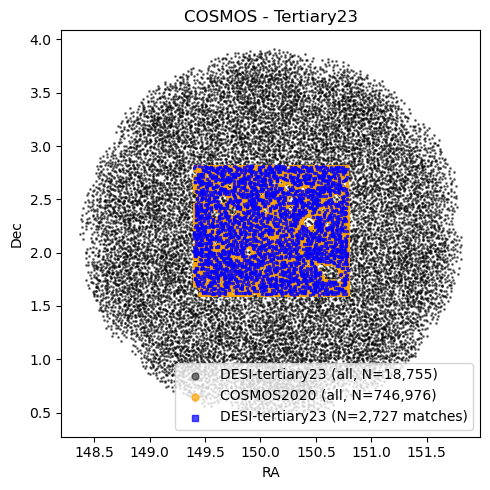

In [14]:
mcosmos2020_ter23, mcosmos2020_desi_ter23 = match_phot_to_desi(cosmos2020, tertiary='23', racolumn='ALPHA_J2000', deccolumn='DELTA_J2000', 
                                                               label='COSMOS2020', title='COSMOS', outprefix='cosmos2020')

### Tertiary 26

Input photometric catalog has 746,976 objects.
Read 21,561 DESI targets from /global/cfs/cdirs/desi/users/raichoor/laelbg/daily/healpix/tertiary26-thru20230416/merge-tertiary26-thru20230416.fits
Matched photometry for 2,504 DESI targets.
Wrote 21,561 objects to /global/cfs/cdirs/desi/users/ioannis/tertiary/deep-photometry/tertiary26-thru20230416-cosmos2020.fits


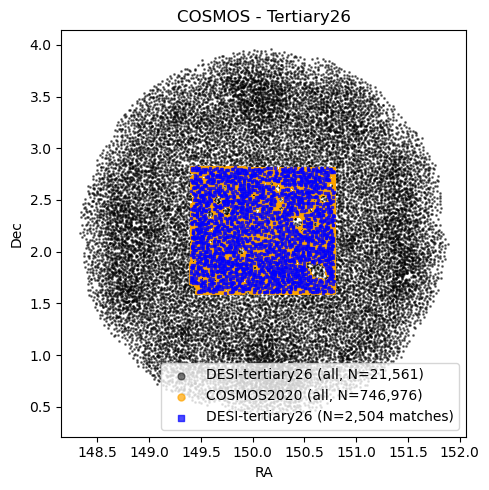

In [15]:
mcosmos2020_ter26, mcosmos2020_desi_ter26 = match_phot_to_desi(cosmos2020, tertiary='26', racolumn='ALPHA_J2000', deccolumn='DELTA_J2000', 
                                                               label='COSMOS2020', title='COSMOS', outprefix='cosmos2020')

Input photometric catalog has 531,823 objects.
Read 21,561 DESI targets from /global/cfs/cdirs/desi/users/raichoor/laelbg/daily/healpix/tertiary26-thru20230416/merge-tertiary26-thru20230416.fits
Matched photometry for 3,820 DESI targets.
Wrote 21,561 objects to /global/cfs/cdirs/desi/users/ioannis/tertiary/deep-photometry/tertiary26-thru20230416-subaru.fits


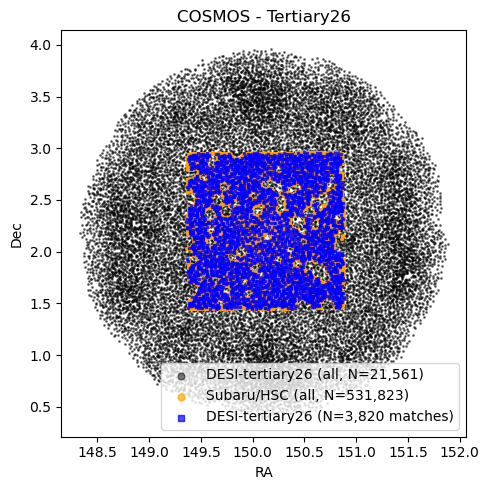

In [16]:
msubaru_ter26, msubaru_desi_ter26 = match_phot_to_desi(subaru_ter26, tertiary='26', racolumn='ra', deccolumn='dec', 
                                                       label='Subaru/HSC', title='COSMOS', outprefix='subaru')

Input photometric catalog has 2,133,588 objects.
Read 21,561 DESI targets from /global/cfs/cdirs/desi/users/raichoor/laelbg/daily/healpix/tertiary26-thru20230416/merge-tertiary26-thru20230416.fits
Matched photometry for 19,131 DESI targets.
Wrote 21,561 objects to /global/cfs/cdirs/desi/users/ioannis/tertiary/deep-photometry/tertiary26-thru20230416-odin-hsc.fits


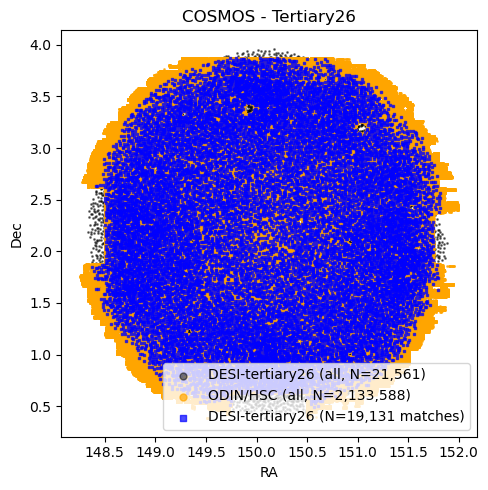

In [17]:
modinhsc_ter26, modinhsc_desi_ter26 = match_phot_to_desi(odinhsc_ter26, tertiary='26', racolumn='ra', deccolumn='dec', 
                                                         label='ODIN/HSC', title='COSMOS', outprefix='odin-hsc')

Input photometric catalog has 2,235,028 objects.
Read 21,561 DESI targets from /global/cfs/cdirs/desi/users/raichoor/laelbg/daily/healpix/tertiary26-thru20230416/merge-tertiary26-thru20230416.fits
Matched photometry for 19,534 DESI targets.
Wrote 21,561 objects to /global/cfs/cdirs/desi/users/ioannis/tertiary/deep-photometry/tertiary26-thru20230416-odin-dr10.fits


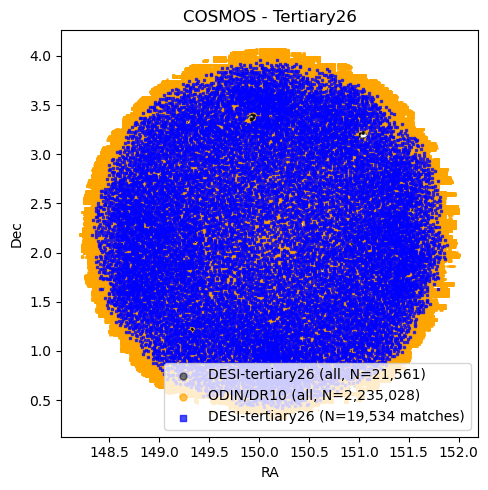

In [18]:
modindr10_ter26, modindr10_desi_ter26 = match_phot_to_desi(odindr10_ter26, tertiary='26', racolumn='ra', deccolumn='dec', 
                                                           label='ODIN/DR10', title='COSMOS', outprefix='odin-dr10')

In [19]:
stop

NameError: name 'stop' is not defined

In [ ]:
def write_speclite_filters(infilters, group_name='tmp'):
    """Write the eazy filters into speclite format.
    
    https://eazy-py.readthedocs.io/en/latest/eazy/filters.html
    https://speclite.readthedocs.io/en/latest/filters.html
    
    """
    import eazy
    import astropy.units as u
    from astropy.table import Table
    from speclite import filters as specfilters

    res = eazy.filters.FilterFile(os.path.join(eazy.utils.path_to_eazy_data(),
                                  'filters/FILTER.RES.latest'))
    
    filtfiles = []
    for filt in infilters.keys():
        T = Table()
        
        wave = np.array(res[infilters[filt][-1]].wave)
        resp = np.array(res[infilters[filt][-1]].throughput)
        wave = np.hstack([np.min(wave)-0.1, wave, np.max(wave)+0.1])
        resp = np.hstack([0.0, resp, 0.0])
        
        meta = dict(group_name=group_name, band_name=f'{filt}')
        ff = specfilters.FilterResponse(wavelength=wave * u.Angstrom,
                                        response=resp, meta=meta)
        
        filtfile = f'{group_name}-{filt}.ecsv'
        filtfiles.append(filtfile)

        ff.save('./')
        #print(filtfile)
        #ff.save(datadir)
        #print(datadir+'/'+filtfile)
        
        #specfilters.plot_filters(filt)#, wavelength_limits=(3500, 6200), cmap='jet')
    #print(np.array(filtfiles))

#### The HSC filters (hsc2017) are already in speclite but we need the intermediate-band filters.

In [ ]:
filtinfo = {}
for band, eazynum in zip(['IA427', 'IA445', 'IA464', 'IA484', 'IA505', 'IA527', 
                          'IA550', 'IA574', 'IA598', 'IA624', 'IA651', 'IA679', 
                          'IA709', 'IA738', 'IA768', 'IA797', 'IA827', 'IA856', 'IA907'],
                          [181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 
                           191, 192, 193, 194, 195, 196, 197, 198, 199]):
    filtinfo[band] = [eazynum]
    
#write_speclite_filters(filtinfo, group_name='hscib')
filt = specfilters.load_filters('hscib-IA427', 'hscib-IA445', 'hscib-IA464', 'hscib-IA484', 'hscib-IA505', 
                                'hscib-IA527', 'hscib-IA550', 'hscib-IA574', 'hscib-IA598', 'hscib-IA624',
                                'hscib-IA651', 'hscib-IA679', 'hscib-IA709', 'hscib-IA738', 'hscib-IA768',
                                'hscib-IA797', 'hscib-IA827', 'hscib-IA856', 'hscib-IA907')
specfilters.plot_filters(filt, wavelength_limits=(3900, 9500), 
                         response_limits=(0, 1.7), legend_ncols=3,
                         legend_loc='upper right')
plt.tight_layout()
plt.savefig('hscib.png')

    GALEX_FUV - 120 CAPAK/galex1500.res FUV lambda_c= 1.5364e+03 AB-Vega= 2.128 w95=372.4  
    GALEX_NUV - 121 CAPAK/galex2500.res NUV lambda_c= 2.2992e+03 AB-Vega= 1.665 w95=925.3  
    CFHT_u - 348 CFHT_Megaprime.u_sdss.dat-cfh9302 lambda_c= 3.54017e+03  
    CFHT_ustar - 88 megaprime/cfht_mega_u_cfh9301.dat CFHT-LS+atm lambda_c= 3.8280e+03 AB-Vega= 0.325 w95=771.0  
    HSC_g - 314 g_HSC.txt http://cosmos.astro.caltech.edu/page/filterset lambda_c=4798.2 AB-Vega=-0.089  
    HSC_r - 315 r_HSC.txt http://cosmos.astro.caltech.edu/page/filterset lambda_c=6218.4 AB-Vega=0.223  
    HSC_i - 316 i_HSC.txt http://cosmos.astro.caltech.edu/page/filterset lambda_c=7727.0 AB-Vega=0.468  
    HSC_z - 317 z_HSC.txt http://cosmos.astro.caltech.edu/page/filterset lambda_c=8908.2 AB-Vega=0.522  
    HSC_y - 318 y_HSC.txt http://cosmos.astro.caltech.edu/page/filterset lambda_c=9775.1 AB-Vega=0.740  
    UVISTA_Y - 256 VISTA/Y_system+atmos.dat at80K_forETC+trans_10_10 lambda_c= 1.0217e+04 AB-Vega= 0.596 w95=1025.7  
    UVISTA_J - 257 VISTA/J_system+atmos.dat lambda_c= 1.2527e+04 AB-Vega= 0.911 w95=1703.1  
    UVISTA_H - 258 VISTA/H_system+atmos.dat lambda_c= 1.6433e+04 AB-Vega= 1.355 w95=2843.9  
    UVISTA_Ks - 259 VISTA/Ks_system+atmos.dat lambda_c= 2.1503e+04 AB-Vega= 1.819 w95=3108.7  
    SC_NB711 - 322 COSMOS/SUBARU_filter_NB711.txt lambda_c= 7.1202e+03 AB-Vega= xxxx  
    SC_NB816 - 84 COSMOS/SUBARU_filter_NB816.txt lambda_c= 8.1509e+03 AB-Vega= 0.461 w95=162.0  
    UVISTA_NB118 - 321 VISTA-NB118 atm lambda_c= 1.1909e+04 AB-Vega= xxxx  
    SC_B - 78 COSMOS/SUBARU_filter_B.txt lambda_c= 4.4480e+03 AB-Vega=-0.112 w95=1035.4  
    SC_gp - 80 COSMOS/SUBARU_filter_g.txt lambda_c= 4.7609e+03 AB-Vega=-0.101 w95=1317.6  
    SC_V - 79 COSMOS/SUBARU_filter_V.txt lambda_c= 5.4702e+03 AB-Vega=-0.000 w95=993.1  
    SC_rp - 116 CAPAK_v2/r_subaru.res cosmos-r lambda_c= 6.2755e+03 AB-Vega= 0.154 w95=1379.4  
    SC_ip - 117 CAPAK_v2/i_subaru.res cosmos-i lambda_c= 7.6712e+03 AB-Vega= 0.380 w95=1488.9  
    SC_zp - 118 CAPAK_v2/z_subaru.res cosmos-z lambda_c= 9.0282e+03 AB-Vega= 0.514 w95=1410.5  
    SC_zpp - 284 Subaru/suprime_FDCCD_z.res lambda_c= 9.0963e+03 AB-Vega=0.516 w95=1424.0  
    IRAC_CH1 - 18 IRAC/irac_tr1_2004-08-09.dat 3.6micron lambda_c= 3.5569e+04 AB-Vega= 2.781 w95=7139.2  
    IRAC_CH2 - 19 IRAC/irac_tr2_2004-08-09.dat 4.5micron lambda_c= 4.5020e+04 AB-Vega= 3.254 w95=9705.5  
    IRAC_CH3 - 20 IRAC/irac_tr3_2004-08-09.dat 5.8micron lambda_c= 5.7450e+04 AB-Vega= 3.747 w95=13590.7  
    IRAC_CH4 - 21 IRAC/irac_tr4_2004-08-09.dat 8.0micron lambda_c= 7.9158e+04 AB-Vega= 4.387 w95=27892.8      


#### Add GALEX.

In [ ]:
filtinfo = {}
for band, eazynum in zip(['fuv', 'nuv'], [120, 121]):
    filtinfo[band] = [eazynum]
    
write_speclite_filters(filtinfo, group_name='galex')
filt = specfilters.load_filters('galex-fuv', 'galex-nuv')
specfilters.plot_filters(filt) #wavelength_limits=(3900, 9500), 
                         #response_limits=(0, 1.7), legend_ncols=3,
                         #legend_loc='upper right')
plt.tight_layout()
plt.savefig('galex.png')

In [ ]:
from speclite import filters as specfilters

ib = subarufilters.copy()
[ib.pop(band) for band in ['g', 'r', 'i', 'z']]
write_speclite_filters(ib, group_name='hscib')

filt = specfilters.load_filters('hsc2017-*', 'hscib-IB427', 'hscib-IB464', 'hscib-IB484', 'hscib-IB505', 'hscib-IB527')
specfilters.plot_filters(filt, wavelength_limits=(3500, 11000), cmap='jet_r')
#plt.savefig('desi2-filters.png')    

In [ ]:
subarufilters